# Hotel Reservation Cancellation
Dataset:https://www.kaggle.com/jessemostipak/hotel-booking-demand/activity
<br>Variable Description: https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0040

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [2]:
DataFrame = pd.read_csv('hotel_bookings.csv')

In [3]:
data = DataFrame.sample(n=50000, random_state=42)
data = data.reset_index()
pd.set_option('display.max_columns', None)
data

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,40207,City Hotel,1,82,2015,July,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
2,103708,City Hotel,0,25,2016,December,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,85144,City Hotel,0,1,2016,March,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,109991,City Hotel,0,70,2017,April,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,82520,City Hotel,0,98,2015,December,53,29,0,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,83.0,NaN,0,Transient-Party,59.5,0,2,Check-Out,2016-01-01
49996,80860,City Hotel,1,0,2017,February,8,21,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,NaN,148.0,0,Transient,80.0,0,0,Canceled,2017-02-21
49997,77053,City Hotel,1,262,2015,November,46,9,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.8,0,0,Canceled,2015-09-04
49998,72281,City Hotel,1,20,2017,July,30,25,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.0,0,0,Canceled,2017-07-06


In [4]:
data.drop('index', axis=1, inplace=True)

In [5]:
data.shape

(50000, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   is_canceled                     50000 non-null  int64  
 2   lead_time                       50000 non-null  int64  
 3   arrival_date_year               50000 non-null  int64  
 4   arrival_date_month              50000 non-null  object 
 5   arrival_date_week_number        50000 non-null  int64  
 6   arrival_date_day_of_month       50000 non-null  int64  
 7   stays_in_weekend_nights         50000 non-null  int64  
 8   stays_in_week_nights            50000 non-null  int64  
 9   adults                          50000 non-null  int64  
 10  children                        50000 non-null  float64
 11  babies                          50000 non-null  int64  
 12  meal                            

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43158.000000,2845.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.371600,104.030080,2016.157220,27.156940,15.802880,0.923300,2.491960,1.857600,0.102120,0.007960,0.031660,0.085060,0.137620,0.221220,86.665091,188.391564,2.26486,101.955308,0.061460,0.573240
std,0.483237,106.953591,0.708288,13.592113,8.754873,0.992168,1.896082,0.550898,0.396856,0.098065,0.175095,0.805951,1.494191,0.645205,110.807878,131.573433,17.43284,48.091588,0.241669,0.794083
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.00000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.00000,69.182500,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.00000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.00000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,9.000000,1.000000,26.000000,72.000000,18.000000,531.000000,541.000000,391.00000,508.000000,3.000000,5.000000


## EDA

### Data Types

In [8]:
pd.DataFrame({'Data type': data.dtypes})

,Data type
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


### Describe Data Features

In [9]:
#categorical variables
data[['is_canceled','is_repeated_guest','arrival_date_year']] = data[['is_canceled','is_repeated_guest','arrival_date_year']].astype(object)
cat_col = [col for col in data.columns if data[col].dtype == 'O']
cat_data = data[cat_col]
cat_data.drop('reservation_status_date', axis=1, inplace=True)
cat_data

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,0,2016,December,BB,GBR,Direct,Direct,0,F,F,No Deposit,Transient,Check-Out
1,City Hotel,1,2015,July,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,Transient,Canceled
2,City Hotel,0,2016,December,BB,BRA,Offline TA/TO,TA/TO,0,A,K,No Deposit,Transient-Party,Check-Out
3,City Hotel,0,2016,March,BB,SWE,Online TA,TA/TO,0,A,A,No Deposit,Transient-Party,Check-Out
4,City Hotel,0,2017,April,SC,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,City Hotel,0,2015,December,BB,ITA,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient-Party,Check-Out
49996,City Hotel,1,2017,February,BB,PRT,Corporate,Corporate,1,A,A,No Deposit,Transient,Canceled
49997,City Hotel,1,2015,November,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,Transient,Canceled
49998,City Hotel,1,2017,July,BB,PRT,Direct,Direct,0,A,A,No Deposit,Transient,Canceled


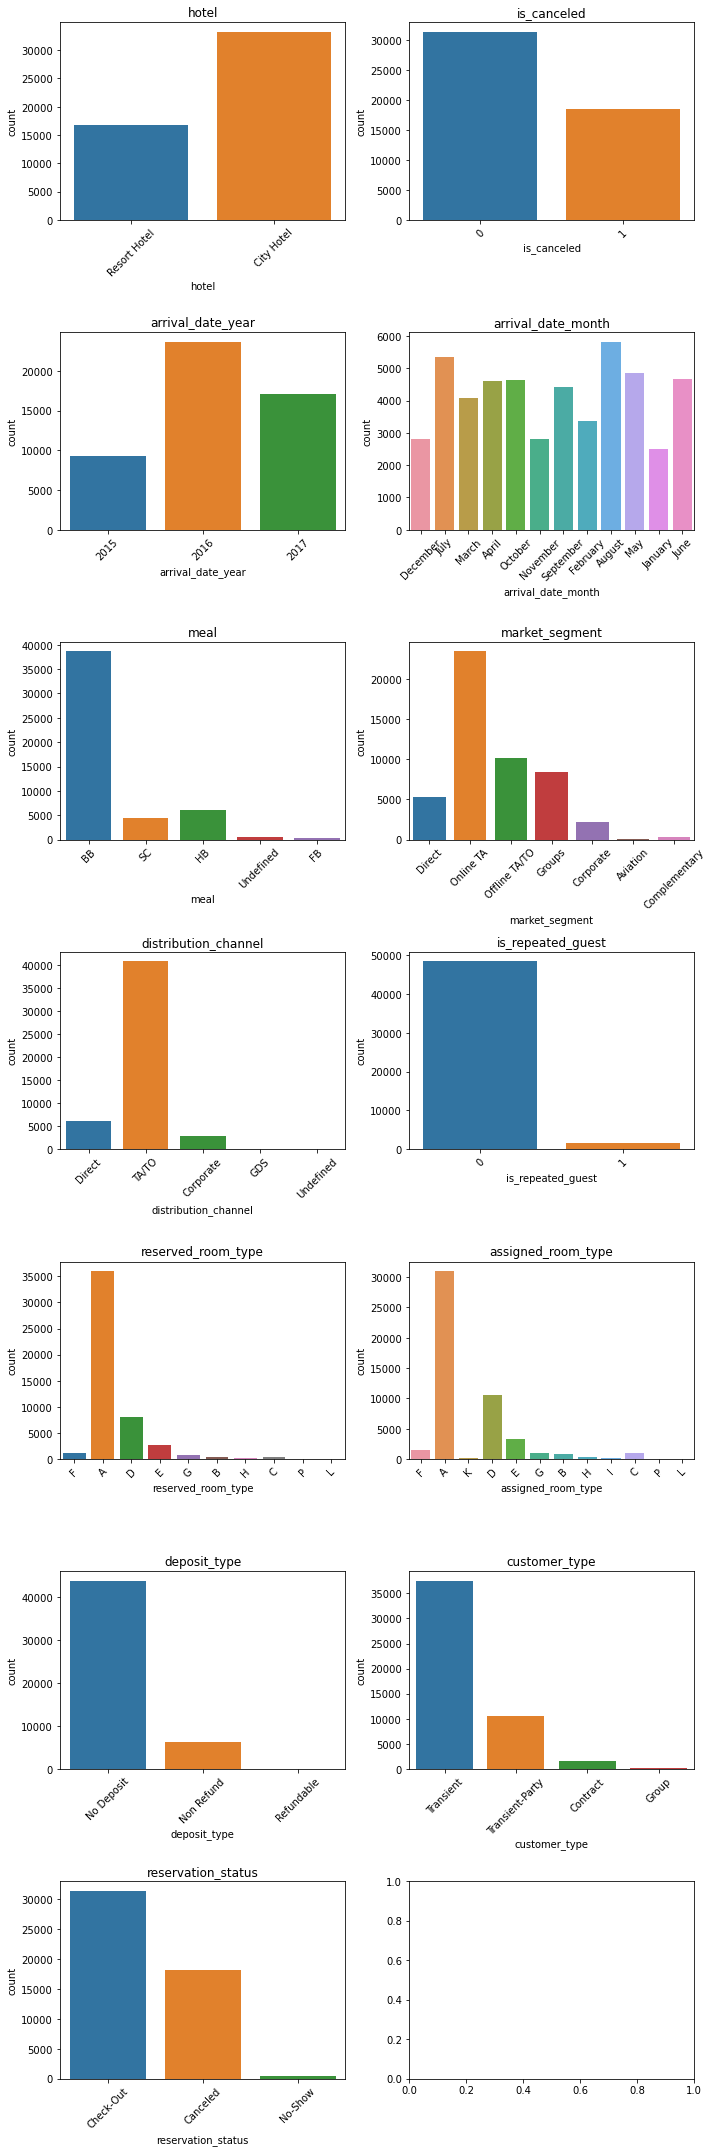

In [10]:
#seperate country column as the values are too many to be included
cat_data.drop('country', axis=1, inplace=True)

#countplot for each categorical variables
f, axes = plt.subplots(7,2,figsize=(10,30))
for f,ax in zip(cat_data, axes.ravel()):
    sns.countplot(cat_data[f], ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_title(f)    
    plt.tight_layout()

<AxesSubplot:xlabel='country', ylabel='count'>

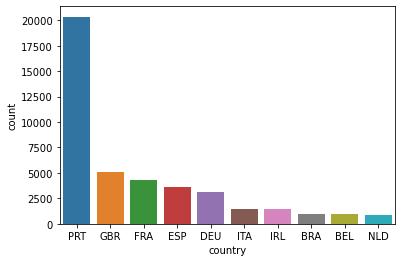

In [11]:
sns.countplot(x='country', data=data, order=pd.value_counts(data['country']).iloc[:10].index)

In [12]:
#numerical variables
num_data1 = data.drop(columns = cat_col, axis = 1)
num_data1

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,203,49,2,2,5,2,0.0,0,0,0,4,250.0,NaN,0,66.8,0,0
1,82,29,16,0,3,2,0.0,0,0,0,0,9.0,NaN,0,76.5,0,0
2,25,53,27,0,3,3,0.0,0,0,0,2,220.0,NaN,0,60.0,0,1
3,1,11,9,0,1,1,0.0,0,0,0,0,9.0,NaN,0,95.0,0,0
4,70,16,16,2,2,2,0.0,0,0,0,0,9.0,NaN,0,108.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,98,53,29,0,3,2,0.0,0,0,0,0,83.0,NaN,0,59.5,0,2
49996,0,8,21,0,1,1,0.0,0,0,7,0,NaN,148.0,0,80.0,0,0
49997,262,46,9,1,2,2,0.0,0,1,0,0,1.0,NaN,0,62.8,0,0
49998,20,30,25,0,2,2,0.0,0,0,0,0,NaN,NaN,0,140.0,0,0


In [13]:
#fill NaN so that it's easier to plot
num_data1.update(num_data1[['agent','company']].fillna(0))

In [14]:
num_data1

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,203,49,2,2,5,2,0.0,0,0,0,4,250.0,0.0,0,66.8,0,0
1,82,29,16,0,3,2,0.0,0,0,0,0,9.0,0.0,0,76.5,0,0
2,25,53,27,0,3,3,0.0,0,0,0,2,220.0,0.0,0,60.0,0,1
3,1,11,9,0,1,1,0.0,0,0,0,0,9.0,0.0,0,95.0,0,0
4,70,16,16,2,2,2,0.0,0,0,0,0,9.0,0.0,0,108.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,98,53,29,0,3,2,0.0,0,0,0,0,83.0,0.0,0,59.5,0,2
49996,0,8,21,0,1,1,0.0,0,0,7,0,0.0,148.0,0,80.0,0,0
49997,262,46,9,1,2,2,0.0,0,1,0,0,1.0,0.0,0,62.8,0,0
49998,20,30,25,0,2,2,0.0,0,0,0,0,0.0,0.0,0,140.0,0,0


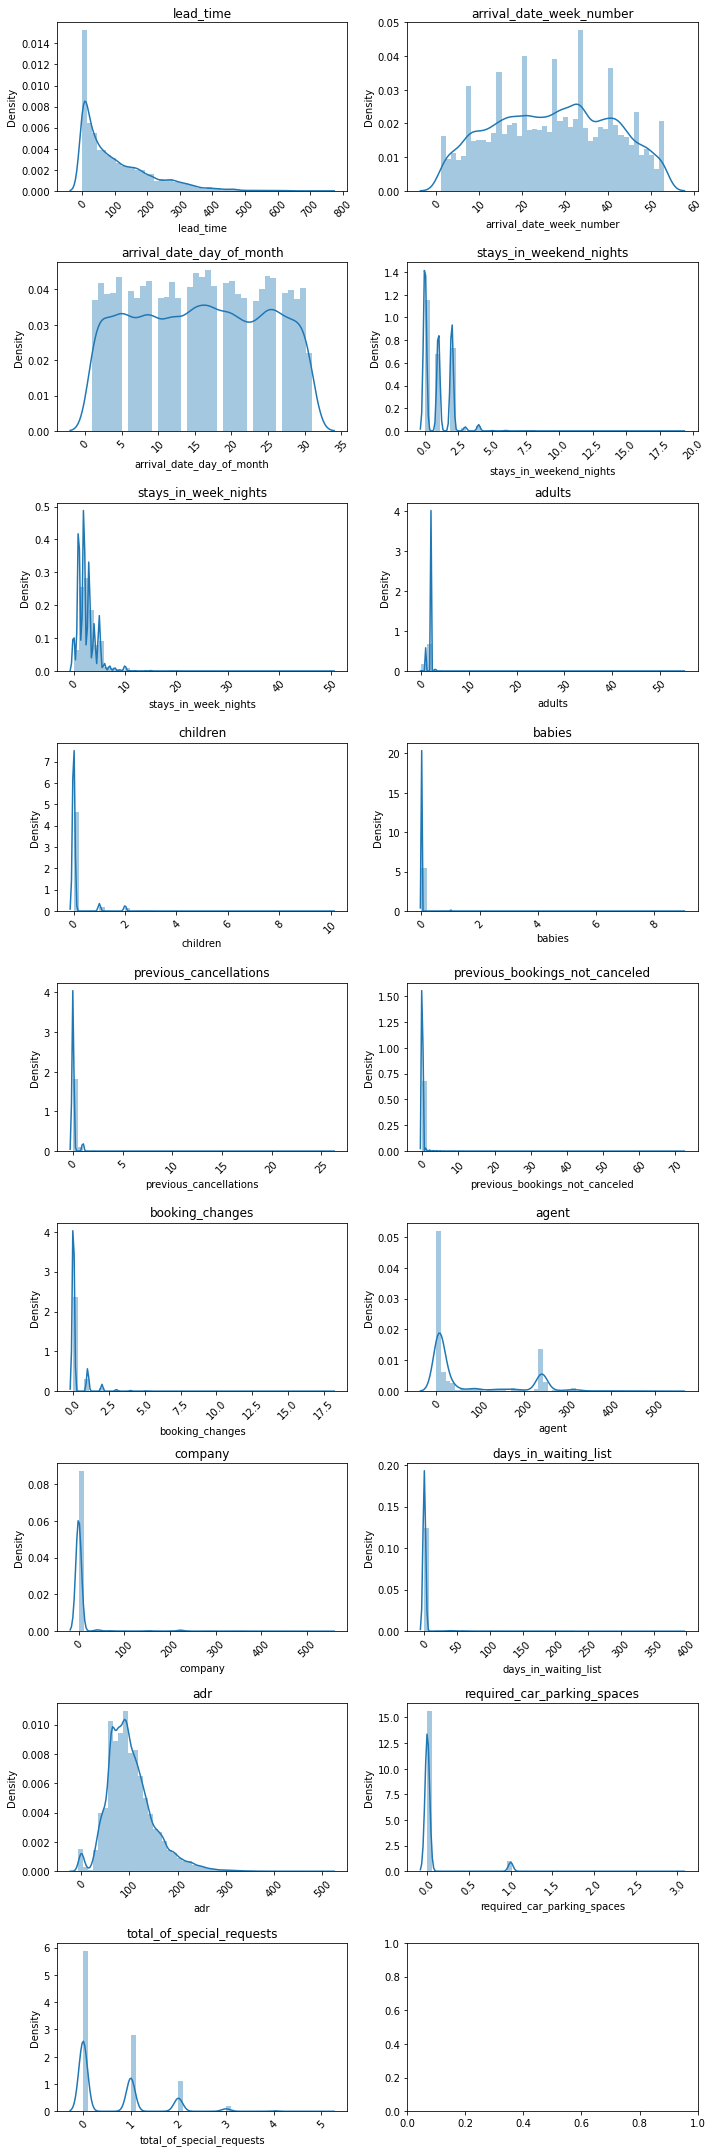

In [15]:
f, axes = plt.subplots(9,2,figsize=(10,30))
for f,ax in zip(num_data1, axes.ravel()):
    sns.distplot(num_data1[f], ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_title(f)    
    plt.tight_layout()

### Where do the customers come from

In [16]:
origin = data[data['is_canceled']==0][['hotel', 'country']]
totalOrigin = origin['country'].value_counts()
totalOrigin[:20]

PRT    8779
GBR    4042
FRA    3541
ESP    2695
DEU    2592
IRL    1100
ITA     976
BEL     748
NLD     712
USA     648
BRA     591
CHE     553
CN      442
AUT     411
SWE     319
POL     297
CHN     206
ISR     196
NOR     187
RUS     179
Name: country, dtype: int64

In [17]:
origin['country'].nunique()

140

In [18]:
origin

,hotel,country
0,Resort Hotel,GBR
2,City Hotel,BRA
3,City Hotel,SWE
4,City Hotel,GBR
5,City Hotel,DEU
...,...,...
49991,Resort Hotel,GBR
49992,City Hotel,PRT
49993,City Hotel,ITA
49995,City Hotel,ITA


In [19]:
total = origin.groupby('country')['hotel'].value_counts(ascending=False)
total

country  hotel       
ABW      City Hotel       2
AGO      City Hotel      69
         Resort Hotel     5
ALB      City Hotel       4
         Resort Hotel     1
                         ..
VNM      Resort Hotel     2
ZAF      City Hotel      18
         Resort Hotel     6
ZMB      Resort Hotel     1
ZWE      Resort Hotel     1
Name: hotel, Length: 224, dtype: int64

In [20]:
country_resort = data[(data['hotel']=='Resort Hotel') &(data['is_canceled'] == 0)]['country'].value_counts().head(10)
country_city = data[(data['hotel']=='City Hotel') &(data['is_canceled'] == 0)]['country'].value_counts().head(10)

frame = {'Resort': country_resort, 'City': country_city}

country2 = pd.DataFrame(frame)
country2

,Resort,City
BEL,159.0,589.0
BRA,NaN,443.0
CN,263.0,NaN
DEU,472.0,2120.0
ESP,1325.0,1370.0
FRA,582.0,2959.0
GBR,2455.0,1587.0
IRL,750.0,NaN
ITA,NaN,819.0
NLD,191.0,521.0


Text(0.5, 1.0, 'Customer Origin Place (City Hotel)')

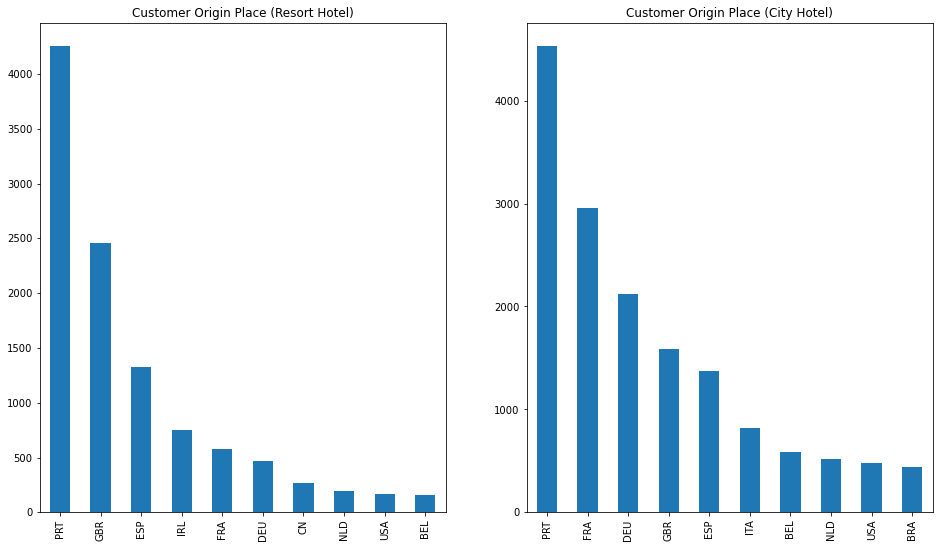

In [21]:
fig = plt.figure(figsize = (16, 9))

ax = fig.add_subplot(121)
country_resort = data[(data['hotel']=='Resort Hotel') &(data['is_canceled'] == 0)]['country'].value_counts().head(10).plot(kind='bar')
ax.set_title('Customer Origin Place (Resort Hotel)')

ax = fig.add_subplot(122)
country_city = data[(data['hotel']=='City Hotel') &(data['is_canceled'] == 0)]['country'].value_counts().head(10).plot(kind='bar')
ax.set_title('Customer Origin Place (City Hotel)')


### Price of room per night? Are there any differences?

In [22]:
data['arrival_date_year'].unique()

array([2016, 2015, 2017], dtype=object)

In [23]:
stay = data[data['is_canceled']==0][['hotel','assigned_room_type', 'adr']]
stay

,hotel,assigned_room_type,adr
0,Resort Hotel,F,66.80
2,City Hotel,K,60.00
3,City Hotel,A,95.00
4,City Hotel,A,108.00
5,City Hotel,D,130.50
...,...,...,...
49991,Resort Hotel,G,130.00
49992,City Hotel,D,108.00
49993,City Hotel,A,62.37
49995,City Hotel,A,59.50


Text(0.5, 1.0, '')

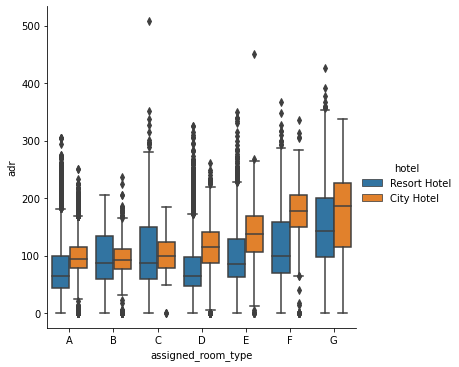

In [24]:
stay = data[data['is_canceled']==0][['hotel', 'assigned_room_type', 'adr']]
sns.catplot(x= 'assigned_room_type', y= 'adr', data=stay, hue='hotel', kind='box',
            order=['A','B','C','D','E','F','G'])
plt.title('')

### How long do the customers stay?

In [25]:
totalStay = data[data['is_canceled']==0][['hotel','stays_in_week_nights', 'stays_in_weekend_nights']]
totalStay['Total'] = totalStay['stays_in_weekend_nights'] + totalStay['stays_in_week_nights']
totalStay

,hotel,stays_in_week_nights,stays_in_weekend_nights,Total
0,Resort Hotel,5,2,7
2,City Hotel,3,0,3
3,City Hotel,1,0,1
4,City Hotel,2,2,4
5,City Hotel,3,0,3
...,...,...,...,...
49991,Resort Hotel,3,1,4
49992,City Hotel,1,0,1
49993,City Hotel,1,0,1
49995,City Hotel,3,0,3


In [26]:
totalStay['Total'].value_counts()

1     6684
3     6563
2     6417
4     4579
7     2344
5     2177
6      930
10     318
8      316
0      287
14     280
9      219
11     126
12      53
13      39
15      19
21      13
28      10
16      10
25       8
17       7
19       6
42       3
22       3
35       1
24       1
27       1
43       1
18       1
45       1
69       1
46       1
20       1
Name: Total, dtype: int64

<Figure size 720x1080 with 0 Axes>

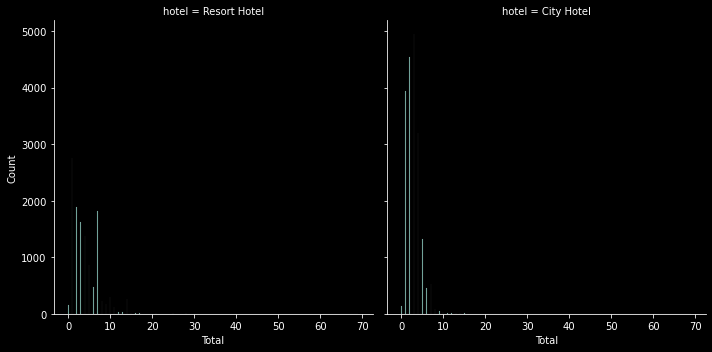

In [27]:
plt.figure(figsize = (10,15))
plt.style.use("dark_background")
sns.displot(x='Total', col='hotel', data=totalStay)

Overall, customers spent more time staying at City Hotel than Resort Hotel

### Are there any market segments?

In [28]:
marketSegment = data['market_segment'].value_counts()
marketSegment

Online TA        23486
Offline TA/TO    10141
Groups            8408
Direct            5351
Corporate         2224
Complementary      292
Aviation            98
Name: market_segment, dtype: int64

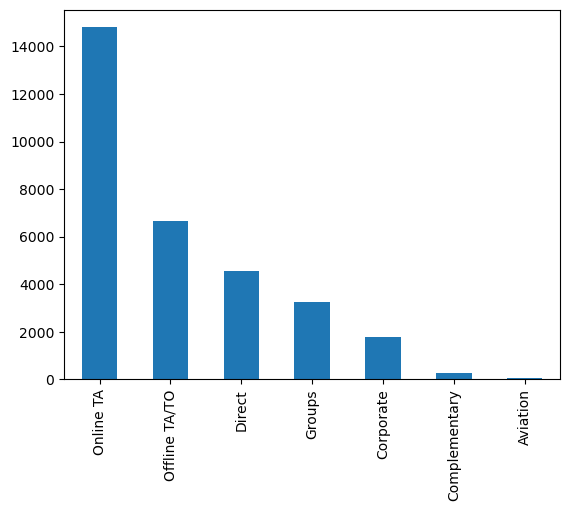

In [34]:
#market segment for 'is_canceled'=0
data[data['is_canceled']==0]['market_segment'].value_counts().plot(kind='bar')
plt.style.use('classic')

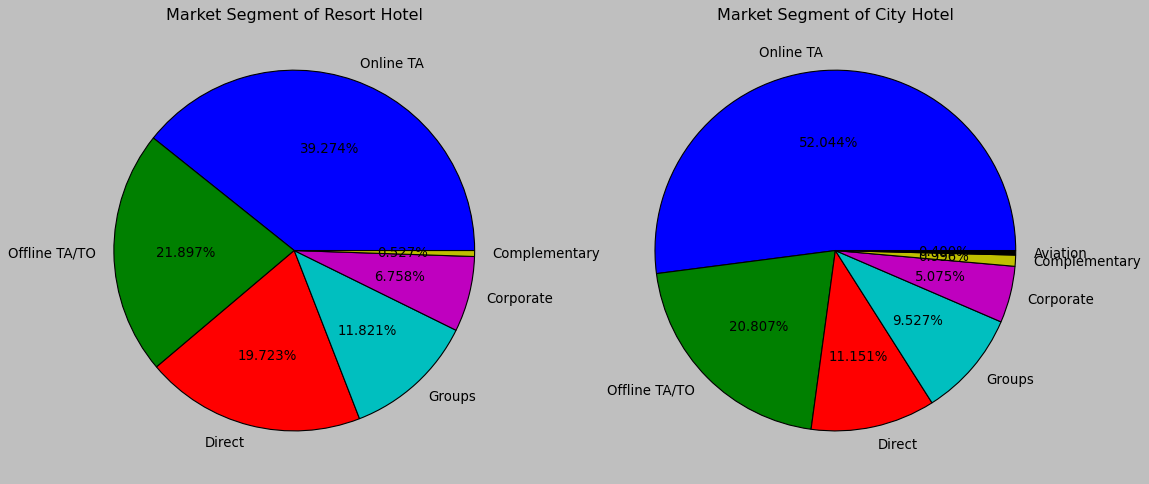

In [35]:
fig = plt.figure(figsize = (16, 9))

ax = fig.add_subplot(121)
ms_resort = data[(data['hotel']=='Resort Hotel') &(data['is_canceled'] == 0)]['market_segment'].value_counts()
ax.set_title('Market Segment of Resort Hotel')
ax = plt.pie(x= ms_resort, labels=ms_resort.index, autopct = '%.3f%%') #add percentage 

ax = fig.add_subplot(122)
ms_city = data[(data['hotel']=='City Hotel') &(data['is_canceled'] == 0)]['market_segment'].value_counts()
ax.set_title('Market Segment of City Hotel')
ax = plt.pie(x= ms_city, labels=ms_city.index, autopct = '%.3f%%') #add percentage 


### Number of customers that canceled/not canceled the hotel booking

In [31]:
#berapa banyak booking yang di cancel/tidak?
data['is_canceled'].value_counts()

0    31420
1    18580
Name: is_canceled, dtype: int64

([<matplotlib.patches.Wedge at 0x251529af250>,
 [Text(-0.2724250628495672, 1.0657319480673408, '0'),
  Text(0.2724250628495671, -1.065731948067341, '1')],
 [Text(-0.14859548882703663, 0.5813083353094586, '57.97'),
  Text(0.14859548882703658, -0.5813083353094587, '42.03')])

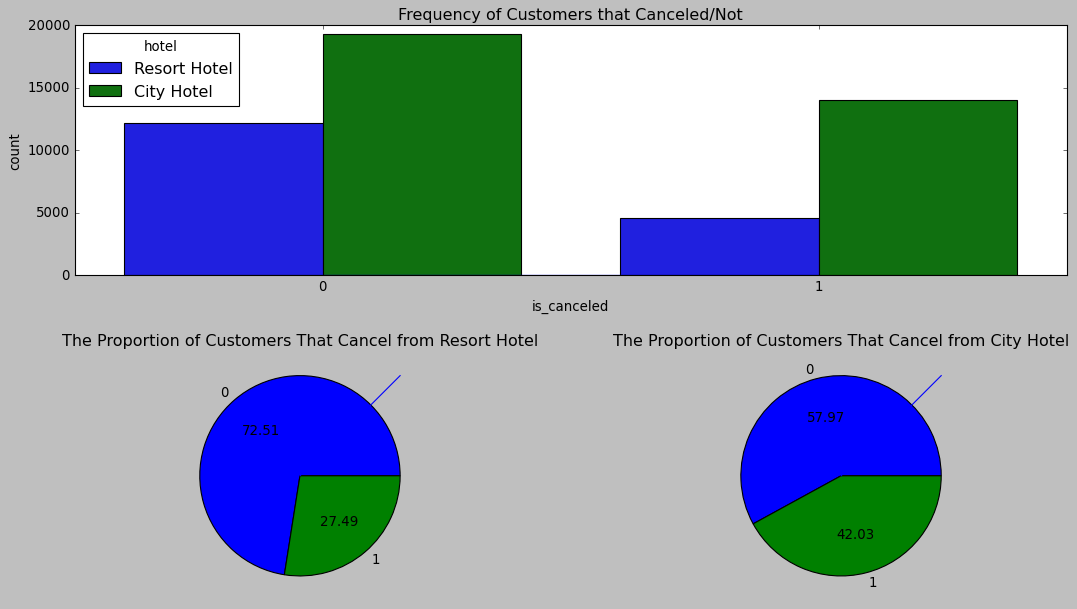

In [36]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize = (16, 9))
fig.tight_layout(pad=3.0)

ax1 = fig.add_subplot(gs[0, :])
ax1.plot([0,1])
plt.title('Frequency of Customers that Canceled/Not')
sns.countplot(x = 'is_canceled', data=data, hue='hotel')
fig.subplots_adjust(hspace=0.3)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot([0,1])
x = data[data['hotel']== 'Resort Hotel']['is_canceled'].value_counts()
plt.title('The Proportion of Customers That Cancel from Resort Hotel')
plt.pie(x, labels=x.index, autopct='%.2f')


ax3 = fig.add_subplot(gs[1, 1])
ax3.plot([0,1])
y = data[data['hotel']== 'City Hotel']['is_canceled'].value_counts()
plt.title('The Proportion of Customers That Cancel from City Hotel')
plt.pie(y, labels=y.index, autopct='%.2f')

<AxesSubplot:xlabel='arrival_date_year'>

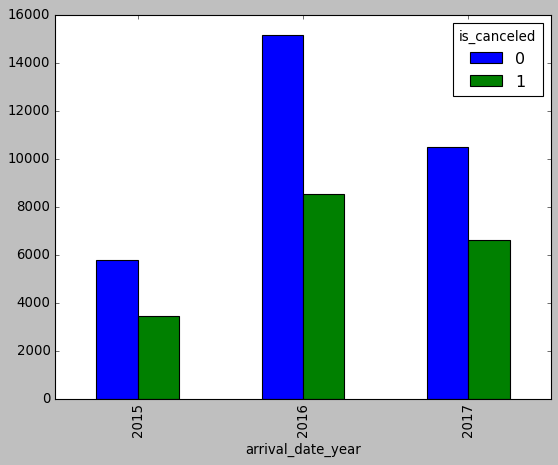

In [37]:
data.groupby(['arrival_date_year', 'is_canceled']).size().unstack().plot(kind='bar')

## Data Cleaning & Preprocessing 

### Handling Missing Value

Text(0, 0.5, 'Missing Values (%)')

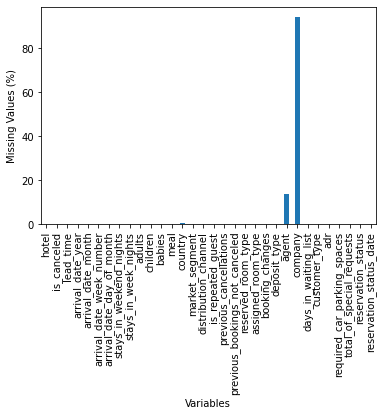

In [16]:
#plot missing data 
(data.isnull().sum()/len(data.index)*100).plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Missing Values (%)')

In [17]:
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             209
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6842
company                           47155


In [18]:
#drop country, company, agent
data = data.drop(['country','company','agent'], axis=1)

### Handling Outliers

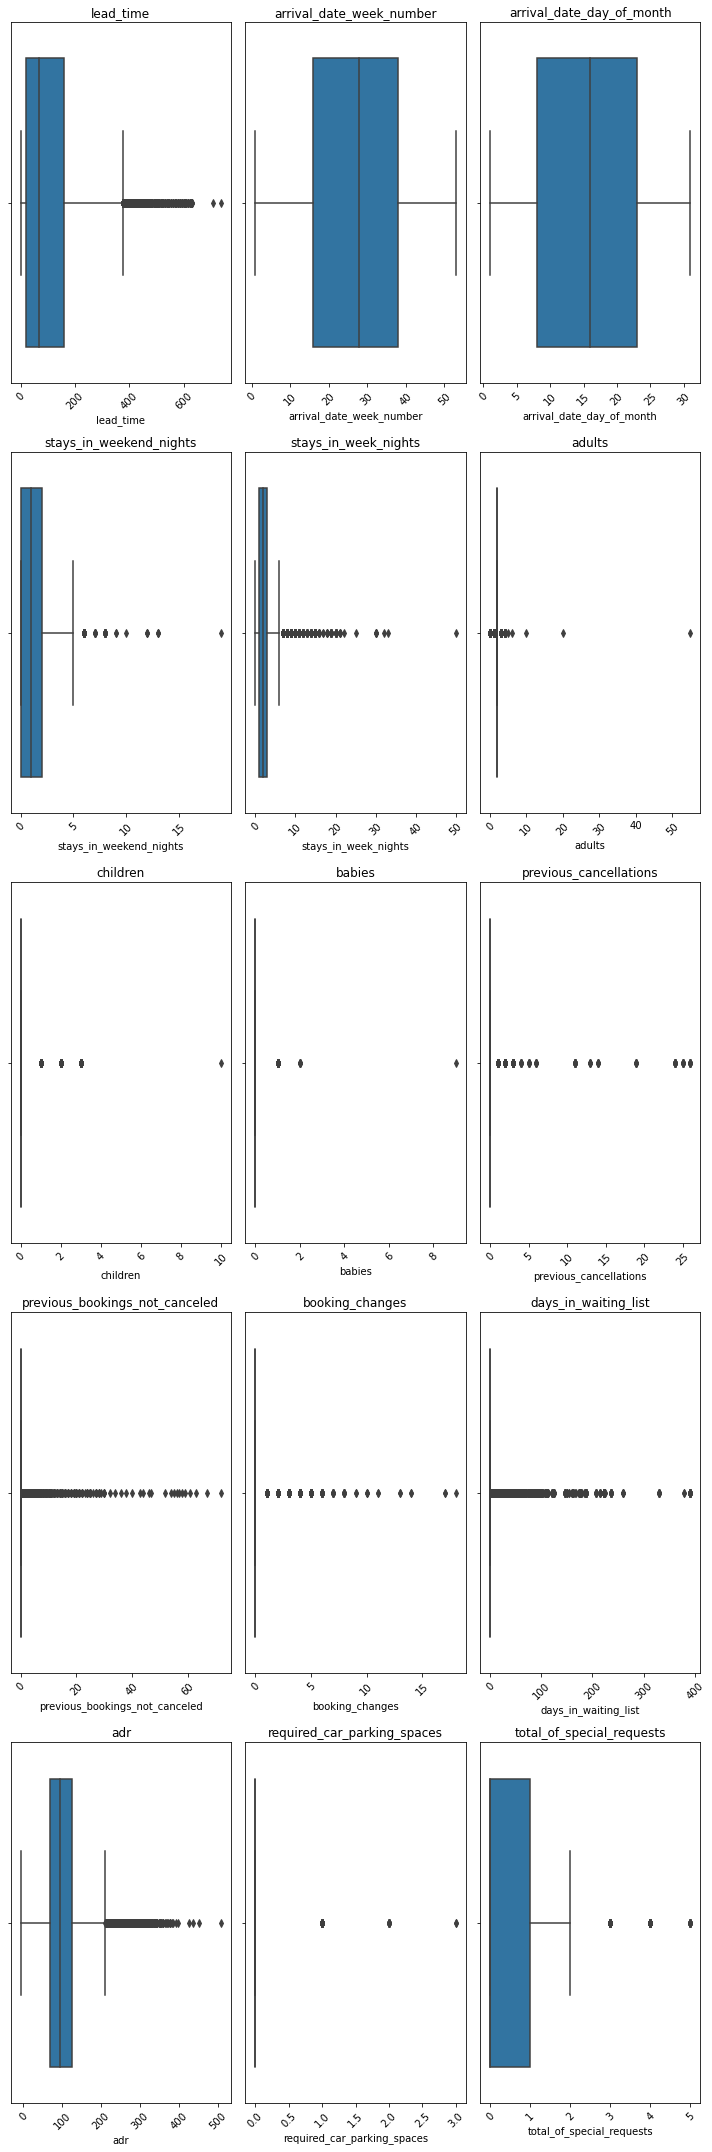

In [19]:
#plot numerical variables
num_data1 = num_data1.drop(['company','agent'], axis=1)

f, axes = plt.subplots(5,3,figsize=(10,30))
for f,ax in zip(num_data1, axes.ravel()):
    sns.boxplot(num_data1[f], ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_title(f)    
    plt.tight_layout()

In [20]:
data[data['adr']>400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1219,Resort Hotel,1,59,2017,August,33,13,2,4,2,2.0,0,FB,Direct,Direct,0,0,0,H,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03
4701,City Hotel,0,81,2016,December,53,31,1,1,2,2.0,0,BB,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
6520,Resort Hotel,0,31,2017,August,31,1,2,6,2,2.0,0,Undefined,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,426.25,0,2,Check-Out,2017-08-09
25580,Resort Hotel,0,1,2015,July,29,15,0,1,2,0.0,0,BB,Corporate,Corporate,1,0,1,A,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16


We have a highly skewed distribution and several ouliers. 
<br> **After some thought, I decided not to treat the outlier(s) because it makes theoretical sense to have values that are out of the range. For example, for index 25580 with the highest ADR (508), booked during the peak season (July), with only one day of lead time.**

In [21]:
#drop all rows bcs it is impossible to have 0 customer
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
288,City Hotel,0,0,2017,March,12,24,0,0,0,0.0,0,BB,Online TA,TA/TO,1,0,0,A,G,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2017-03-24
611,City Hotel,0,51,2017,March,10,8,0,0,0,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,D,1,No Deposit,0,Transient,0.00,0,0,Check-Out,2017-03-08
742,City Hotel,1,4,2017,February,8,21,0,3,0,0.0,0,SC,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.00,0,0,Canceled,2017-02-17
2619,City Hotel,1,0,2017,March,11,16,0,3,0,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Canceled,2017-03-16
2621,City Hotel,0,7,2017,April,16,20,2,3,0,0.0,0,SC,Corporate,Corporate,0,0,0,A,K,1,No Deposit,0,Transient,0.00,0,1,Check-Out,2017-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48714,City Hotel,0,19,2016,February,8,14,3,5,0,0.0,0,BB,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,0,Transient,0.00,0,1,Check-Out,2016-02-22
48716,City Hotel,0,1,2017,May,21,23,0,2,0,0.0,0,SC,Direct,Direct,0,0,0,A,K,2,No Deposit,0,Transient,0.00,1,0,Check-Out,2017-05-25
48964,City Hotel,0,177,2016,December,53,30,2,5,0,0.0,0,BB,Direct,Direct,0,0,0,E,K,2,No Deposit,0,Transient,1.29,0,2,Check-Out,2017-01-06
49419,City Hotel,0,0,2015,September,37,11,0,2,0,0.0,0,BB,Groups,Corporate,0,0,0,A,K,1,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-09-13


In [22]:
data = data[~filter]

In [23]:
#drop required_car_parking_spaces == 3 bcs it doesnt make sense if the adults==2
a = data[data['required_car_parking_spaces'] > 2].index
a

Int64Index([5238, 36308], dtype='int64')

In [24]:
data.drop(a, inplace=True)

### Handling Duplicates

In [25]:
#check any duplicate data
data.duplicated().any()

True

In [26]:
data[data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
102,City Hotel,1,97,2015,October,41,5,1,3,1,0.0,0,BB,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,140.00,0,0,Canceled,2015-07-03
134,City Hotel,1,97,2015,October,41,5,1,3,1,0.0,0,BB,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,140.00,0,0,Canceled,2015-07-03
210,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,100.00,0,0,Canceled,2016-04-04
221,City Hotel,1,364,2015,October,42,16,0,2,2,0.0,0,HB,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,0,Transient-Party,101.50,0,0,Canceled,2015-07-06
446,Resort Hotel,1,32,2016,April,17,19,2,5,2,0.0,0,HB,Groups,Direct,0,0,0,D,D,0,No Deposit,0,Transient-Party,69.36,0,0,Canceled,2016-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,City Hotel,0,414,2017,July,28,13,0,2,2,0.0,0,HB,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,122.40,0,1,Check-Out,2017-07-15
49990,City Hotel,0,28,2016,June,25,14,0,3,1,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,108.42,0,1,Check-Out,2016-06-17
49994,City Hotel,1,80,2017,March,13,31,0,2,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,90.00,0,0,Canceled,2017-01-10
49997,City Hotel,1,262,2015,November,46,9,1,2,2,0.0,0,BB,Groups,TA/TO,0,1,0,A,A,0,Non Refund,0,Transient,62.80,0,0,Canceled,2015-09-04


In [27]:
data = data.drop_duplicates(keep='first')

### Handling Data Types Errors

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38641 entries, 0 to 49998
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           38641 non-null  object 
 1   is_canceled                     38641 non-null  int64  
 2   lead_time                       38641 non-null  int64  
 3   arrival_date_year               38641 non-null  int64  
 4   arrival_date_month              38641 non-null  object 
 5   arrival_date_week_number        38641 non-null  int64  
 6   arrival_date_day_of_month       38641 non-null  int64  
 7   stays_in_weekend_nights         38641 non-null  int64  
 8   stays_in_week_nights            38641 non-null  int64  
 9   adults                          38641 non-null  int64  
 10  children                        38641 non-null  float64
 11  babies                          38641 non-null  int64  
 12  meal                            

**Data Types Errors**
- children = integral
- is_cancelled, is_repeated_guest = obj
- reservation_status_date = date


In [29]:
data['children'] = data['children'].astype(int)
data[['is_canceled', 'is_repeated_guest']] = data[['is_canceled', 'is_repeated_guest']].astype(object)
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

data['reservation_year'] = data['reservation_status_date'].dt.year
data['reservation_month'] = data['reservation_status_date'].dt.month
data['resevation_date'] = data['reservation_status_date'].dt.day
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38641 entries, 0 to 49998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           38641 non-null  object        
 1   is_canceled                     38641 non-null  object        
 2   lead_time                       38641 non-null  int64         
 3   arrival_date_year               38641 non-null  object        
 4   arrival_date_month              38641 non-null  object        
 5   arrival_date_week_number        38641 non-null  int64         
 6   arrival_date_day_of_month       38641 non-null  int64         
 7   stays_in_weekend_nights         38641 non-null  int64         
 8   stays_in_week_nights            38641 non-null  int64         
 9   adults                          38641 non-null  int64         
 10  children                        38641 non-null  int32         
 11  ba

## Model Building and Hyperparameter Tuning

In [30]:
#drop these columns as it is made after the booking has been canceled/confirmed 
data.drop(['reservation_status_date', 'reservation_status', 'assigned_room_type', 'days_in_waiting_list'], axis =1, inplace = True)

In [31]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,resevation_date
0,Resort Hotel,0,203,2016,December,49,2,2,5,2,0,0,BB,Direct,Direct,0,0,0,F,4,No Deposit,Transient,66.80,0,0,2016,12,9
1,City Hotel,1,82,2015,July,29,16,0,3,2,0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient,76.50,0,0,2015,7,16
2,City Hotel,0,25,2016,December,53,27,0,3,3,0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,2,No Deposit,Transient-Party,60.00,0,1,2016,12,30
3,City Hotel,0,1,2016,March,11,9,0,1,1,0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient-Party,95.00,0,0,2016,3,10
4,City Hotel,0,70,2017,April,16,16,2,2,2,0,0,SC,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient,108.00,0,0,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,City Hotel,0,2,2016,February,9,26,0,1,2,0,0,BB,Online TA,TA/TO,0,0,0,D,0,No Deposit,Transient,108.00,0,1,2016,2,27
49993,City Hotel,0,8,2015,November,48,26,0,1,1,0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient,62.37,0,0,2015,11,27
49995,City Hotel,0,98,2015,December,53,29,0,3,2,0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,Transient-Party,59.50,0,2,2016,1,1
49996,City Hotel,1,0,2017,February,8,21,0,1,1,0,0,BB,Corporate,Corporate,1,0,7,A,0,No Deposit,Transient,80.00,0,0,2017,2,21


### Encoding for Categorical Variables

In [32]:
data[['arrival_date_year', 'reservation_year']] = data[['arrival_date_year', 'reservation_year']].astype(object)

cat_col2 = [col for col in data.columns if data[col].dtype == 'O']
cat_data2 = data[cat_col2]
cat_data2

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,reservation_year
0,Resort Hotel,0,2016,December,BB,Direct,Direct,0,F,No Deposit,Transient,2016
1,City Hotel,1,2015,July,BB,Online TA,TA/TO,0,A,No Deposit,Transient,2015
2,City Hotel,0,2016,December,BB,Offline TA/TO,TA/TO,0,A,No Deposit,Transient-Party,2016
3,City Hotel,0,2016,March,BB,Online TA,TA/TO,0,A,No Deposit,Transient-Party,2016
4,City Hotel,0,2017,April,SC,Online TA,TA/TO,0,A,No Deposit,Transient,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,City Hotel,0,2016,February,BB,Online TA,TA/TO,0,D,No Deposit,Transient,2016
49993,City Hotel,0,2015,November,BB,Online TA,TA/TO,0,A,No Deposit,Transient,2015
49995,City Hotel,0,2015,December,BB,Offline TA/TO,TA/TO,0,A,No Deposit,Transient-Party,2016
49996,City Hotel,1,2017,February,BB,Corporate,Corporate,1,A,No Deposit,Transient,2017


In [33]:
#drop is_canceled
cat_data2.drop('is_canceled', axis=1, inplace=True)

In [34]:
cat_data2['hotel'] = cat_data2.hotel.astype('category').cat.codes
cat_data2['arrival_date_year'] = cat_data2.arrival_date_year.astype('category').cat.codes
cat_data2['arrival_date_month'] = cat_data2.arrival_date_month.astype('category').cat.codes
cat_data2['meal'] = cat_data2.meal.astype('category').cat.codes
cat_data2['market_segment'] = cat_data2.market_segment.astype('category').cat.codes
cat_data2['distribution_channel'] = cat_data2.distribution_channel.astype('category').cat.codes
cat_data2['is_repeated_guest'] = cat_data2.is_repeated_guest.astype('category').cat.codes
cat_data2['reserved_room_type'] = cat_data2.reserved_room_type.astype('category').cat.codes
cat_data2['reservation_year'] = cat_data2.reservation_year.astype('category').cat.codes
cat_data2['deposit_type'] = cat_data2.deposit_type.astype('category').cat.codes
cat_data2['customer_type'] = cat_data2.customer_type.astype('category').cat.codes

In [35]:
cat_data2.reset_index(drop=True)

,hotel,arrival_date_year,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,reservation_year
0,1,1,2,0,3,1,0,5,0,2,2
1,0,0,5,0,6,3,0,0,0,2,1
2,0,1,2,0,5,3,0,0,0,3,2
3,0,1,7,0,6,3,0,0,0,3,2
4,0,2,0,3,6,3,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
38636,0,1,3,0,6,3,0,3,0,2,2
38637,0,0,9,0,6,3,0,0,0,2,1
38638,0,0,2,0,5,3,0,0,0,3,2
38639,0,2,3,0,2,0,1,0,0,2,3


### Scaling numerical data

In [36]:
num_data2 = data.drop(columns = cat_col2, axis = 1)
num_data2

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_month,resevation_date
0,203,49,2,2,5,2,0,0,0,0,4,66.80,0,0,12,9
1,82,29,16,0,3,2,0,0,0,0,0,76.50,0,0,7,16
2,25,53,27,0,3,3,0,0,0,0,2,60.00,0,1,12,30
3,1,11,9,0,1,1,0,0,0,0,0,95.00,0,0,3,10
4,70,16,16,2,2,2,0,0,0,0,0,108.00,0,0,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,2,9,26,0,1,2,0,0,0,0,0,108.00,0,1,2,27
49993,8,48,26,0,1,1,0,0,0,0,0,62.37,0,0,11,27
49995,98,53,29,0,3,2,0,0,0,0,0,59.50,0,2,1,1
49996,0,8,21,0,1,1,0,0,0,7,0,80.00,0,0,2,21


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
num_data3 = scaler.fit_transform(num_data2)

In [39]:
num_data3 = pd.DataFrame(num_data3, columns= num_data2.columns)
num_data3.reset_index(drop=True)

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_month,resevation_date
0,1.337855,1.618492,-1.568713,0.988728,1.186204,0.209658,-0.293788,-0.092147,-0.087615,-0.104199,5.375766,-0.761452,-0.290554,-0.830803,1.764779,-0.772434
1,-0.014478,0.154165,0.020336,-0.974502,0.195913,0.209658,-0.293788,-0.092147,-0.087615,-0.104199,-0.376875,-0.572256,-0.290554,-0.830803,0.223322,0.025003
2,-0.651527,1.911358,1.268874,-0.974502,0.195913,1.939621,-0.293788,-0.092147,-0.087615,-0.104199,2.499446,-0.894084,-0.290554,0.372235,1.764779,1.619877
3,-0.919759,-1.163729,-0.774189,-0.974502,-0.794378,-1.520304,-0.293788,-0.092147,-0.087615,-0.104199,-0.376875,-0.211418,-0.290554,-0.830803,-1.009844,-0.658514
4,-0.148594,-0.797647,0.020336,0.988728,-0.299232,0.209658,-0.293788,-0.092147,-0.087615,-0.104199,-0.376875,0.042144,-0.290554,-0.830803,-0.701552,0.480682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38636,-0.908583,-1.310162,1.155370,-0.974502,-0.794378,0.209658,-0.293788,-0.092147,-0.087615,-0.104199,-0.376875,0.042144,-0.290554,0.372235,-1.318135,1.278119
38637,-0.841525,1.545276,1.155370,-0.974502,-0.794378,-1.520304,-0.293788,-0.092147,-0.087615,-0.104199,-0.376875,-0.847858,-0.290554,-0.830803,1.456488,1.278119
38638,0.164343,1.911358,1.495881,-0.974502,0.195913,0.209658,-0.293788,-0.092147,-0.087615,-0.104199,-0.376875,-0.903837,-0.290554,1.575273,-1.626427,-1.683790
38639,-0.930935,-1.383378,0.587853,-0.974502,-0.794378,-1.520304,-0.293788,-0.092147,-0.087615,4.035713,-0.376875,-0.503989,-0.290554,-0.830803,-1.318135,0.594601


### Data Splitting 

In [40]:
#concat
x = pd.concat([cat_data2, num_data2], axis = 1)
data['is_canceled'] = data['is_canceled'].astype(int)
y = data['is_canceled']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
x_train

,hotel,arrival_date_year,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,reservation_year,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_month,resevation_date
15671,1,2,8,0,5,3,0,0,0,2,3,107,21,27,2,5,2,0,0,0,0,0,80.43,0,0,6,3
23980,1,1,10,0,4,0,0,2,0,3,2,8,41,6,1,3,2,2,0,0,0,1,82.00,0,0,10,10
38321,0,1,5,0,6,3,0,0,0,2,2,155,31,25,1,1,2,0,0,0,0,0,105.30,0,0,7,19
8907,0,1,9,0,6,3,0,0,0,2,2,10,46,10,0,1,1,0,0,0,0,0,120.00,0,0,11,2
2394,0,1,10,0,5,3,0,4,0,2,2,8,41,7,2,2,2,0,0,0,0,0,176.00,0,0,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,0,9,1,4,3,0,0,0,3,1,36,47,20,0,2,2,0,0,0,0,0,64.00,0,0,11,22
13195,0,2,0,0,6,3,0,3,0,2,3,86,14,4,0,5,2,0,0,0,0,0,100.48,0,2,4,9
49295,0,2,8,0,6,3,0,0,0,2,3,111,18,2,0,4,2,0,0,0,0,2,126.00,0,1,5,6
881,1,2,0,2,5,3,0,0,0,0,3,63,15,10,1,2,1,0,0,0,0,0,63.95,0,0,4,13


### Data Modelling, Confusion Matrix, and Classification Report

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [44]:
from sklearn.metrics import plot_confusion_matrix

#### 1. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [46]:
compare1 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_lr})
compare1

,Actual,Prediction
46096,0,0
35207,0,0
49453,1,0
34490,1,0
33571,0,0
...,...,...
46324,0,0
13591,0,0
7132,0,0
29082,0,0


In [47]:
confusion_matrix(y_test, y_pred_lr)

array([[5139,  304],
       [1516,  770]], dtype=int64)

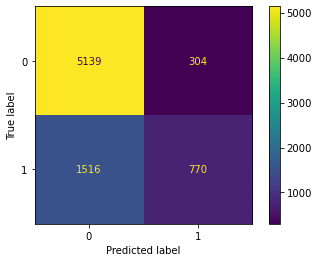

In [48]:
plot_confusion_matrix(lr, x_test, y_test)

In [49]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      5443
           1       0.72      0.34      0.46      2286

    accuracy                           0.76      7729
   macro avg       0.74      0.64      0.65      7729
weighted avg       0.76      0.76      0.73      7729



In [50]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy Score of Logistic Regression is : {acc_lr}')

Accuracy Score of Logistic Regression is : 0.7645232242204684


#### 2. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [52]:
compare2 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_rf})
compare2

,Actual,Prediction
46096,0,0
35207,0,0
49453,1,1
34490,1,1
33571,0,0
...,...,...
46324,0,0
13591,0,0
7132,0,0
29082,0,0


In [53]:
confusion_matrix(y_test, y_pred_rf)

array([[5393,   50],
       [ 526, 1760]], dtype=int64)

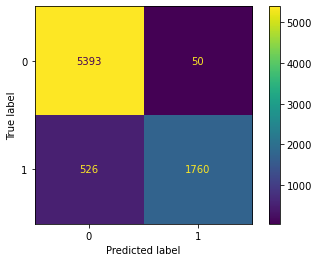

In [54]:
plot_confusion_matrix(rf, x_test, y_test)

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5443
           1       0.97      0.77      0.86      2286

    accuracy                           0.93      7729
   macro avg       0.94      0.88      0.90      7729
weighted avg       0.93      0.93      0.92      7729



In [56]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Score of Random Forest is : {acc_rf}')

Accuracy Score of Random Forest is : 0.9254754819510933


#### 3. Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [58]:
compare3 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_dt})
compare3

,Actual,Prediction
46096,0,0
35207,0,1
49453,1,1
34490,1,1
33571,0,0
...,...,...
46324,0,0
13591,0,0
7132,0,0
29082,0,0


In [59]:
confusion_matrix(y_test, y_pred_dt)

array([[5106,  337],
       [ 395, 1891]], dtype=int64)

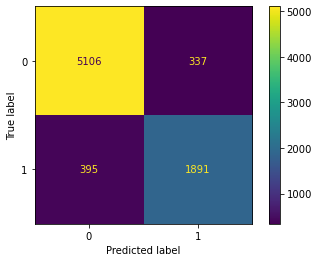

In [60]:
plot_confusion_matrix(dt, x_test, y_test)

In [61]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5443
           1       0.85      0.83      0.84      2286

    accuracy                           0.91      7729
   macro avg       0.89      0.88      0.89      7729
weighted avg       0.90      0.91      0.90      7729



In [77]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy Score of Decision Tree Classifier is : {acc_dt}')

Accuracy Score of Decision Tree Classifier is : 0.9052917583128477


#### 4. Extra Tree Classifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
y_pred_etc = etc.predict(x_test)

In [63]:
compare4 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_etc})
compare4

,Actual,Prediction
46096,0,0
35207,0,0
49453,1,1
34490,1,1
33571,0,0
...,...,...
46324,0,0
13591,0,0
7132,0,0
29082,0,0


In [64]:
confusion_matrix(y_test, y_pred_etc)

array([[5381,   62],
       [ 510, 1776]], dtype=int64)

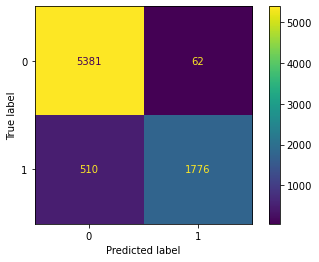

In [65]:
plot_confusion_matrix(etc, x_test, y_test)

In [66]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5443
           1       0.97      0.78      0.86      2286

    accuracy                           0.93      7729
   macro avg       0.94      0.88      0.91      7729
weighted avg       0.93      0.93      0.92      7729



In [67]:
acc_etc = accuracy_score(y_test, y_pred_etc)
print(f'Accuracy Score of Extra Tree Classifier is : {acc_etc}')

Accuracy Score of Extra Tree Classifier is : 0.9259930133264329


### Hyperparameter using RandomizedSearchCV/ GridSearchCV

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [70]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [71]:
#create parameter grid
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [74]:
model = LogisticRegression()

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    }
}

In [75]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.927952,"{'criterion': 'entropy', 'max_features': 'auto..."


In [76]:
df['best_params']

0    {'criterion': 'entropy', 'max_features': 'auto...
Name: best_params, dtype: object

## Model Evaluation

In [79]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',],
    'Score' : [acc_lr, acc_dt, acc_rf]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.925475
1,Decision Tree Classifier,0.905292
0,Logistic Regression,0.764523


In [80]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5443
           1       0.97      0.77      0.86      2286

    accuracy                           0.93      7729
   macro avg       0.94      0.88      0.90      7729
weighted avg       0.93      0.93      0.92      7729



we can predict reservation that will cancel with confidence of:
- accuracy - 93%

from this information hotel can contact client that is predicted to cancel in order to get a cancellation confirmation earlier. hence, the hotel can avoid loss 